In [21]:
import pandas as pd
from google.colab import files
upload = files.upload()

Saving sdss classification.csv to sdss classification (1).csv


Last time I showed how Random Forest could Classify this data set. However, last time I took out manually some of the features, this time I want python to do it for me. 

In [22]:
import io
df = pd.read_csv(io.BytesIO(upload['sdss classification.csv']))

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [24]:
def cat_to_num (classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2
df['class'] = df['class'].apply(cat_to_num)

In [25]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,1,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,0,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,1,0.014019,447,51877,229


In [26]:
#Splitting the data to separate target from features
X = df.drop('class', axis=1)
y = df['class']

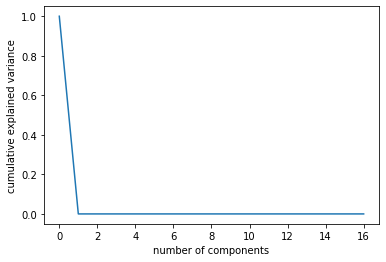

In [27]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

One can see that there is a feature which is getting all the variance because the data is not scaled, so I need to scale the data first. 

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

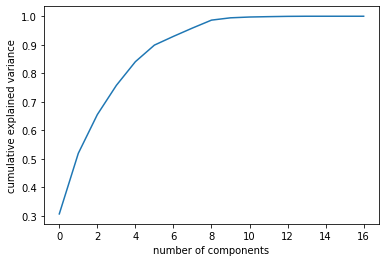

In [29]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
pca = PCA(7)
X_proj = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, train_size=0.8, shuffle=True)


In [31]:
#Modeling using Decision Tree
Model_Tree = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = Model_Tree.predict(X_test)

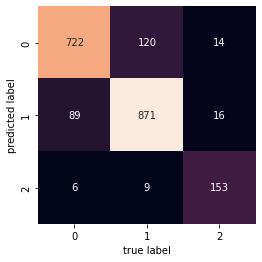

In [32]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
print(pca.explained_variance_ratio_)

[0.30675716 0.2125822  0.13579038 0.10241795 0.08306836 0.0581675
 0.03062928]


In [34]:
#Random Forest Model
Model_Forest = RandomForestClassifier(n_estimators =100, random_state =44)
Model_Forest.fit(X_train, y_train)
y_forpred = Model_Forest.predict(X_test)

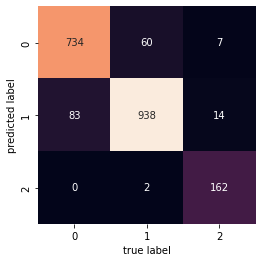

In [35]:
mat = confusion_matrix(y_test, y_forpred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

LET'S TRY ANOTHER METHOD AND SEE IF IT WORKS BETTER SUCH AS LDA.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, train_size=0.8, shuffle=True)

X_lda_train = lda.fit_transform(X_train1, y_train1)
X_lda_test = lda.transform(X_test1)

In [37]:
Model_Forest = RandomForestClassifier(n_estimators =100, random_state =44)
Model_Forest.fit(X_lda_train,y_train1)
y_lda_pred = Model_Forest.predict(X_lda_test)

Text(91.68, 0.5, 'predicted label')

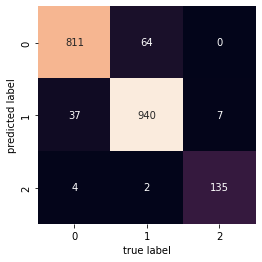

In [38]:
mat1 = confusion_matrix(y_test1, y_lda_pred)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

IT WORKS BETTER, BUT MAYBE THE DATA IS NON-LINEAR AND ANOTHER METHOD SUCH AS KERNELPCA WORKS BETTER

In [39]:
from sklearn.decomposition import KernelPCA

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, train_size=0.5, shuffle=True)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_train2)
X_kpca_train = kpca.inverse_transform(X_kpca)
X_kpca1 = kpca.transform(X_test2)
X_kpca_test = kpca.inverse_transform(X_kpca1)

In [40]:
Model_Forest = RandomForestClassifier(n_estimators =100, random_state =44)
Model_Forest.fit(X_kpca_train,y_train2)
y_kpca_pred = Model_Forest.predict(X_kpca_test)

Text(91.68, 0.5, 'predicted label')

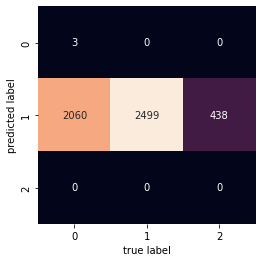

In [41]:
mat1 = confusion_matrix(y_test2, y_kpca_pred)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Ok, so we have seen the best PCA method to use so far is LDA. What happens if I combine LDA with Deep Learning? Let's find out! 

In [42]:
X_lda_train[:,:].shape

(8000, 2)

In [76]:
from keras import models
from keras import layers

model = models.Sequential()
#model.add(layers.Dense(10, activation='relu', input_shape=(2,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [77]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
x_val = X_lda_train[:1000]
partial_x_train = X_lda_train[1000:]

y_val = y_train1[:1000]
partial_y_train = y_train1[1000:]

In [79]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(partial_y_train)
one_hot_val_labels = to_categorical(y_val)

In [80]:
x_val.shape

(1000, 2)

In [81]:
one_hot_val_labels.shape

(1000, 3)

In [82]:
history = model.fit(partial_x_train,
                    one_hot_train_labels,
                    epochs=35,
                    batch_size=600,
                    validation_data=(x_val, one_hot_val_labels))

Epoch 1/35
12/12 [==============================] - 1s 19ms/step - loss: 0.8745 - accuracy: 0.7977 - val_loss: 0.8319 - val_accuracy: 0.8370
Epoch 2/35
12/12 [==============================] - 0s 4ms/step - loss: 0.7998 - accuracy: 0.8689 - val_loss: 0.7703 - val_accuracy: 0.8730
Epoch 3/35
12/12 [==============================] - 0s 4ms/step - loss: 0.7429 - accuracy: 0.8946 - val_loss: 0.7158 - val_accuracy: 0.8920
Epoch 4/35
12/12 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.9076 - val_loss: 0.6647 - val_accuracy: 0.9100
Epoch 5/35
12/12 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.9117 - val_loss: 0.6163 - val_accuracy: 0.9140
Epoch 6/35
12/12 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.9123 - val_loss: 0.5706 - val_accuracy: 0.9150
Epoch 7/35
12/12 [==============================] - 0s 5ms/step - loss: 0.5501 - accuracy: 0.9137 - val_loss: 0.5278 - val_accuracy: 0.9160
Epoch 8/35
12/12 [=

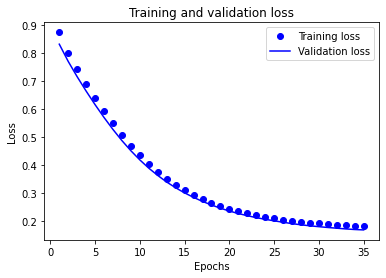

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

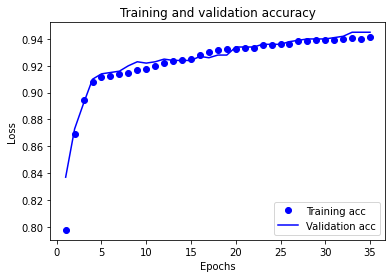

In [84]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
predictions = model.predict(X_lda_test)

63/63 [==============================] - 1s 2ms/step


In [90]:
predictions.shape, predictions[0]

((2000, 3), array([0.01501109, 0.10361593, 0.8813729 ], dtype=float32))

In [89]:
y_test1.shape

(2000,)

In [107]:
#We need to get labels from the predictions so let's create a function to do that 
def prediction_label(predictions):
  r = np.zeros(len(predictions))
  for i in range(len(predictions)):
    r[i] = np.argmax(predictions[i])
  return r 

In [108]:
y_DL_pred = prediction_label(predictions)

In [109]:
pred_df = pd.DataFrame(y_DL_pred)

Text(91.68, 0.5, 'predicted label')

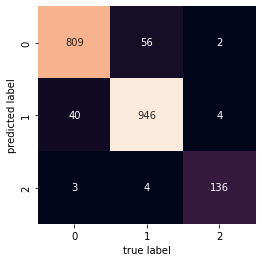

In [110]:
mat1 = confusion_matrix(y_test1, pred_df)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')